<a href="https://colab.research.google.com/github/WambuiN/Moringa_IP/blob/main/WambuiNjoroge_DSCore6_IP9_TitanicDataset_Using_KNN%20-%20FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Defining the Question

The goal for this analysis is to study the using the given information (dataset) The data collected focused on survivors of the Titanic Ship. 

a) Specifying the Question

‘Survived’ is the target variable in the Titanic Dataset. Determining the other variables that affect the the target variable.

b) Defining the Metric for Success



*   Training the Titanic Dataset using KNN Model.
*   Hyperparameter Training of the KNN Model inorder to achive the highest accuracy






c) Understanding the context

The dataset has information about passengers of the RMS Titanic Ship. RMS Titanic sank in the early morning of 15 April 1912 in the North Atlantic Ocean, four days into the ship’s maiden voyage from Southampton to New York City. It ended as a tragic voyage.



d) Recording the Experimental Design

1. Load data and preview preliminary characteristics

2. Data Cleaning (check for and deal with outliers, anomalies and missing data)

3. Exploratory Analysis

4. Implementing the Solution

5. Challenging the Solution

6. Conclusion

e) Data Relevance

The data available for this project was provided in two datasets i.e. a Train and Test Dataset.  The dataset has information on that focused on surival of the passengers onboard the famous Titanic.

Some of the attributes availbale in the dataset include passenger class, age of the passengers, gender, fare charged, the embarked stations among others.

# Importing the Relevant Libraries

In [50]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# 2. Reading the Data

In [51]:
titanic_train = pd.read_csv('/content/train (5) (1).csv')
titanic_test = pd.read_csv('/content/test (1) (1).csv')

In [52]:
titanic_train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Checking the Data

In [54]:
# Determining the no. of records in our dataset
#
titanic_train.shape

(891, 12)

In [55]:
titanic_test.shape

(418, 11)

In [56]:
#Checking Column Names

titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
# Previewing the top of our dataset
#
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [59]:
titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [60]:
# Previewing the bottom of our dataset
# 
titanic_train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [61]:
titanic_test.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [62]:
# Checking whether each column has an appropriate datatype
#
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

# 5. Tidying the Dataset

In [64]:
# check for duplicate records

titanic_train['PassengerId'].duplicated().any()

False

In [65]:
titanic_test['PassengerId'].duplicated().any()

False

No duplicated entries found in both datasets on the variable Passenger ID.

In [66]:
# checking if there are Missing Data
#
print(titanic_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [67]:
ids = titanic_train["Age"]
nulls = titanic_train[ids.isin(ids[ids.isnull()])]
nulls

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [68]:
ids2 = titanic_train["Cabin"]
nulls = titanic_train[ids2.isin(ids[ids.isnull()])]
nulls

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [69]:
ids3 = titanic_train["Embarked"]
nulls = titanic_train[ids3.isin(ids[ids.isnull()])]
nulls

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [70]:
print(titanic_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [71]:
ids4 = titanic_test["Cabin"]
nulls = titanic_test[ids4.isin(ids[ids.isnull()])]
nulls

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [72]:
#Dropping Null Values
titanic_train.drop('Cabin',axis=1, inplace=True)

In [73]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [74]:
titanic_test.drop('Cabin',axis=1, inplace=True)

In [75]:
titanic_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [76]:
titanic_train.drop('Cabin',axis=1, inplace=True)
titanic_test.drop('Cabin',axis=1, inplace=True)

KeyError: ignored

We are going the impute the missing values in the ‘Age’ column by taking the mean value in each group.

In [82]:
#We are going the impute the missing values in the ‘Age’ column by taking the mean value in each group.
titanic_train['Age'].fillna(titanic_train['Age'].mean(),inplace=True)

In [83]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [79]:
titanic_test['Age'].fillna(titanic_test['Age'].mean(),inplace=True)

In [81]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [84]:
#Dropping the Null Values in the Datasets
titanic_train = titanic_train.dropna(axis=0, subset=['Embarked'])


In [85]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [87]:
titanic_test = titanic_test.dropna(axis=0, subset=['Fare'])

In [88]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


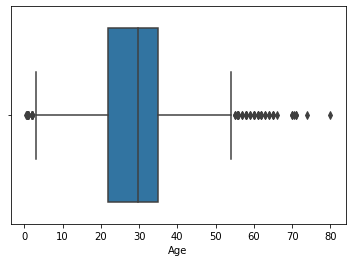

In [95]:
# Checking for Outliers
sns.boxplot(titanic_train['Age'])

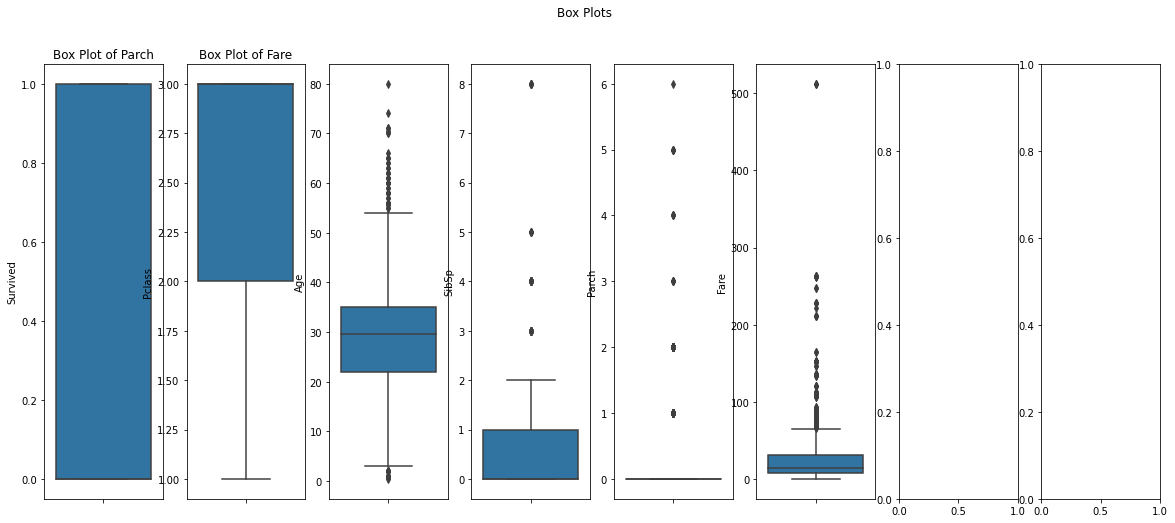

In [101]:
# Checking for Outliers
# plotting boxplots to check outliers. 
#
fig, ax = plt.subplots(1,8, figsize=(20,8))
fig.suptitle('Box Plots')
sns.boxplot(data=titanic_train, y = "Survived", ax=ax[0])
ax[0].set_title('Box Plot of Survived')
sns.boxplot(data=titanic_train, y = "Pclass", ax=ax[1])
ax[1].set_title('Box Plot of Pclass')
sns.boxplot(data=titanic_train, y = "Age", ax=ax[2])
ax[1].set_title('Box Plot of Age')
sns.boxplot(data=titanic_train, y = "SibSp", ax=ax[3])
ax[1].set_title('Box Plot of SibSp')
sns.boxplot(data=titanic_train, y = "Parch", ax=ax[4])
ax[0].set_title('Box Plot of Parch')
sns.boxplot(data=titanic_train, y = "Fare", ax=ax[5])
ax[1].set_title('Box Plot of Fare')


plt.show()

Age and Fare columns have some outliers. We shall only take note of this but still keep the outliers since they could be valid observations to our analysis.

In [109]:
#Final Datasets
titanic_train.shape

(889, 11)

In [110]:
titanic_test.shape

(417, 10)

# 6. Exploratory Analysis

# Univariate Analysis

In [89]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [90]:
# Frequency table for the passengers that Survived
titanic_train.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [91]:
# Frequency table for the Sex of the Passengers 
titanic_train.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [92]:
# Frequency table for the Embarked Passengers 
titanic_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [93]:
# Frequency table for the Embarked Passengers 
titanic_train.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [94]:
# Frequency table for the Embarked Passengers 
titanic_train.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [103]:
# Frequency table for the Passengers Class
titanic_train.Pclass.value_counts()


3    491
1    214
2    184
Name: Pclass, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


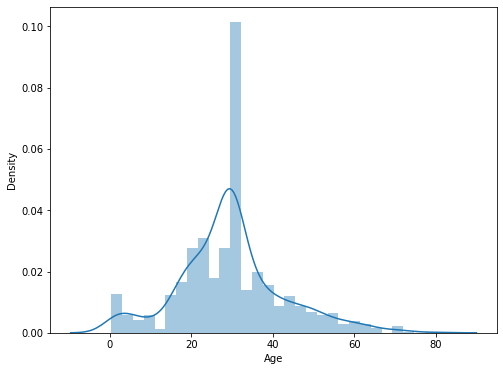

In [102]:
#Distribution of Passengers Age
fig,axes = plt.subplots(figsize=(8,6))
sns.distplot(titanic_train.Age, hist=True,kde =True, label = 'Age')

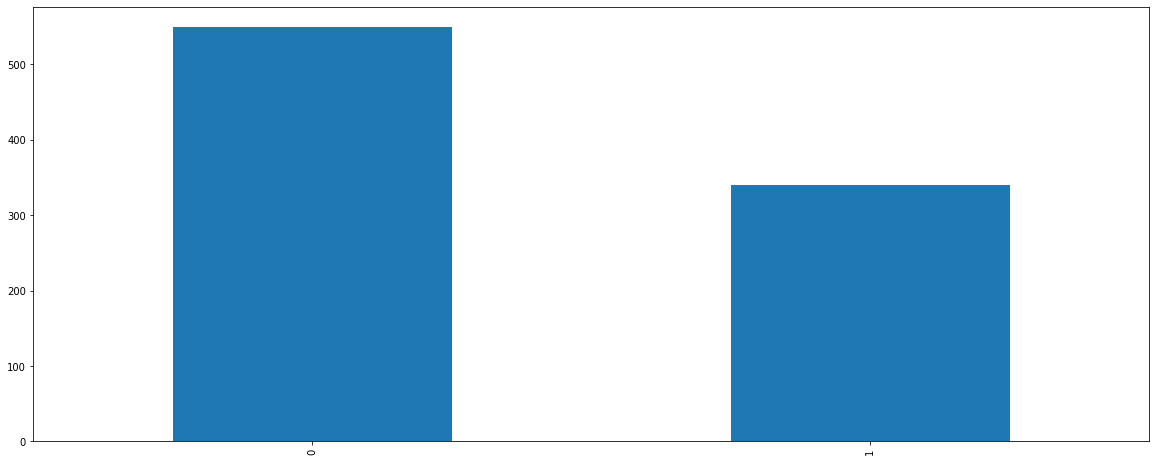

In [105]:
# Distribution of Survived Passenger 
#
titanic_train['Survived'].value_counts().plot.bar(figsize=(20,8))

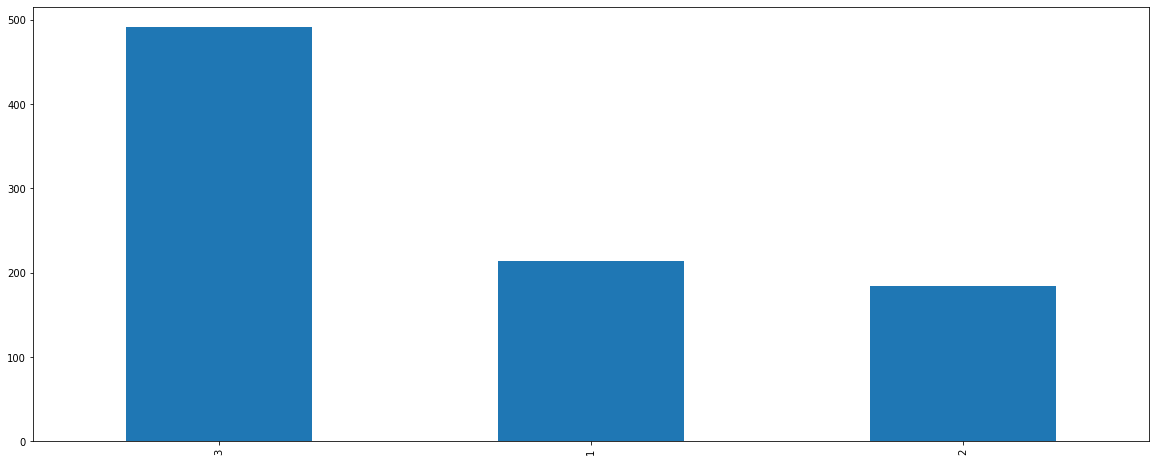

In [104]:
# Distribution of Passenger Class
#
titanic_train['Pclass'].value_counts().plot.bar(figsize=(20,8))

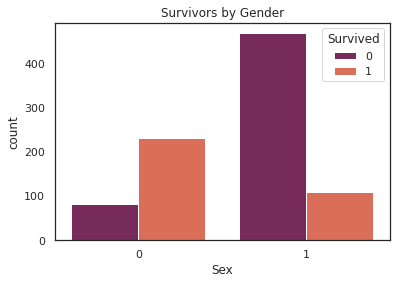

In [132]:
sns.countplot(x='Sex',hue="Survived", data=titanic_train,palette="rocket")
plt.title('Survivors by Gender')
plt.show()

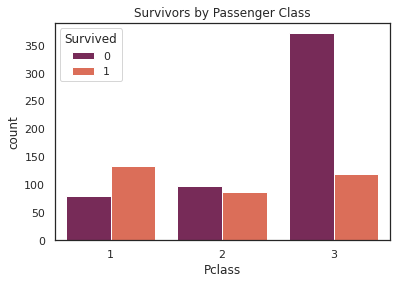

In [134]:
sns.countplot(x='Pclass',hue="Survived", data=titanic_train,palette="rocket")
plt.title('Survivors by Passenger Class')
plt.show()

Statistical Summary of the Datasets

In [107]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,2.263789,30.200103,0.448441,0.393285,35.627188
std,120.923774,0.842077,12.562386,0.897568,0.982419,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1205.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Bivariate Analysis

In [111]:

# Label Encoding the Categorical Variables

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate columns

le = LabelEncoder()
titanic_train['Sex'] = le.fit_transform(titanic_train['Sex'])
titanic_train['Embarked'] = le.fit_transform(titanic_train['Embarked'])

titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2


In [114]:
#Drop columns
titanic_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)


In [115]:
titanic_train1 = titanic_train

In [116]:
titanic_train1.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [117]:
titanic_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [118]:
titanic_test1 = titanic_test

In [119]:
titanic_test1.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q


In [120]:
# Label Encoding the Categorical Variables

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate columns

le = LabelEncoder()
titanic_test1['Sex'] = le.fit_transform(titanic_test1['Sex'])
titanic_test1['Embarked'] = le.fit_transform(titanic_test1['Embarked'])

titanic_test1.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1


FIINAL DATASETS


In [122]:
titanic_train1.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


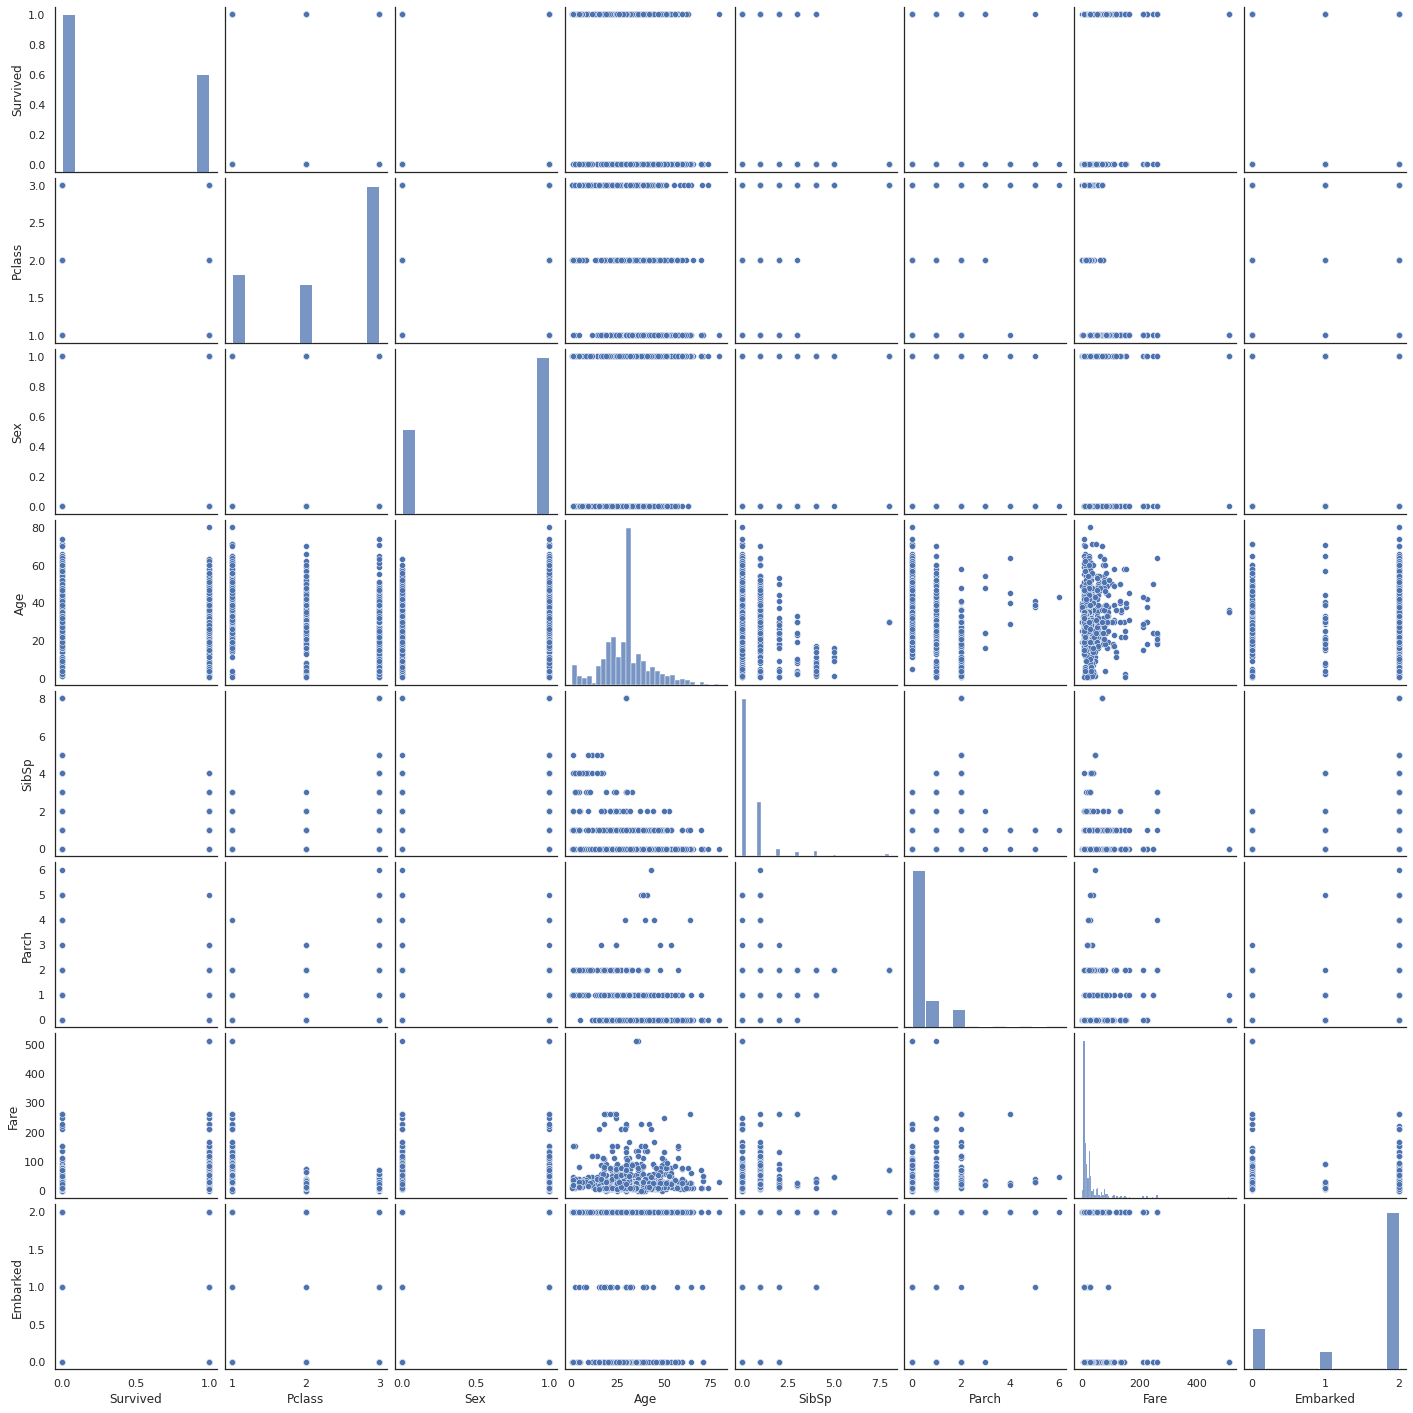

In [135]:
# Ploting the bivariate summaries and recording observations
#
sns.pairplot(titanic_train1)
plt.show()

Text(0.5, 1.0, 'Multi-Collinearity of the Variables')

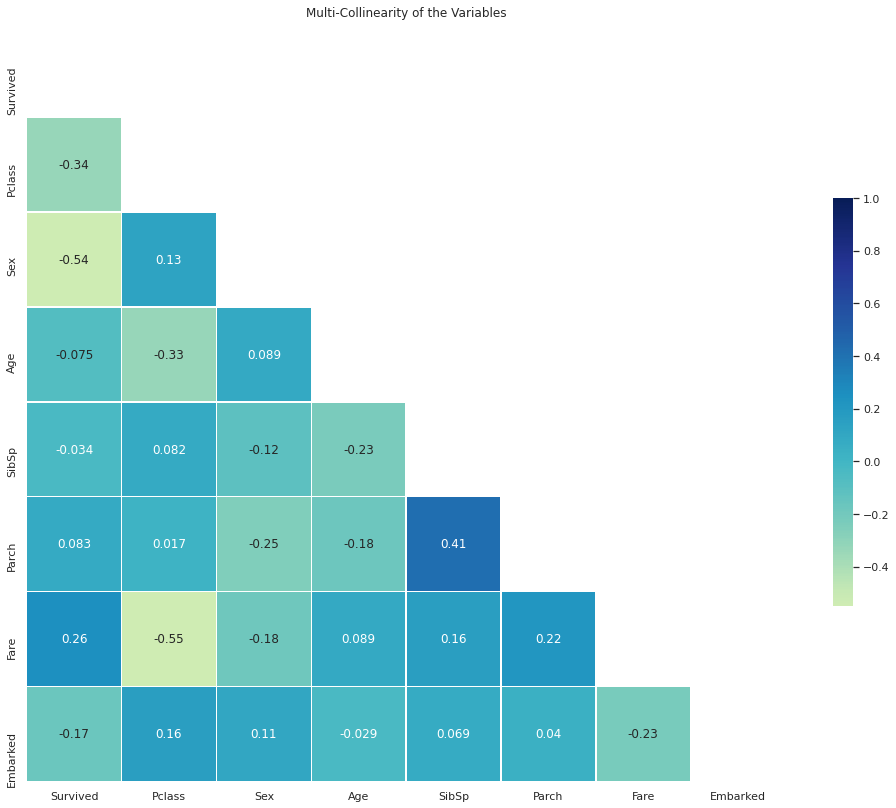

In [123]:
#heat map for correlation purposes
sns.set(style="white")
# Create a covariance matrix
corr = titanic_train1.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17,15))
# Generate a custom diverging colormap
cmap = "YlGnBu"
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, annot = True,
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of the Variables')

Checking for Multicollinearity

In [129]:
correlations = titanic_train1.corr()
correlations

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,0.088604,-0.028927
SibSp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.088604,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,-0.226311,1.000000


# 7. Implementing the Solution

K-Nearest Neighbor (KNN) Classifier

Importing the Libraries


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV

In [137]:

# Splitting our dataset into its attributes and labels
X = titanic_train1.drop(['Survived'],axis=1).values
y = titanic_train1['Survived'].values

In [138]:
# Train Test Split
# ---
 
from sklearn.model_selection import train_test_split

X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [139]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [140]:
# Training and Predictions
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [141]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1])

In [143]:
# Evaluating the Algorithm
# ---

#from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[86 19]
 [32 41]]
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       105
           1       0.68      0.56      0.62        73

    accuracy                           0.71       178
   macro avg       0.71      0.69      0.69       178
weighted avg       0.71      0.71      0.71       178



KNN model gives an accuracy of 71%

In [144]:
#Splitting the dataset to features and labels
X = titanic_train.drop(['Survived'],axis=1).values
y = titanic_train['Survived'].values

#Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [145]:
#List the Hyperparameters
leaf_size = list(range(1, 50))
n_neighbors= list(range(1, 30))
p = [1, 2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors , p=p)

#KNN Object
classifier1 = KNeighborsClassifier()
clf = GridSearchCV(classifier1, hyperparameters, cv=10)

#Fitting the Model
clf.fit(X_train, y_train)

#best params
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 26, 'p': 1}

In [146]:

#making y predictions
y_pred = clf.predict(X_test)
print(y_pred)

#model score
print(clf.score(X_test,y_test))

#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
#print(accuracy.score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1]
0.7359550561797753
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       105
           1       0.73      0.56      0.64        73

    accuracy                           0.74       178
   macro avg       0.73      0.71      0.71       178
weighted avg       0.74      0.74      0.73       178



Tuning the model increased the accuracy to 74%

Repeating using 60-40

In [149]:

#Splitting the dataset to features and labels
X = titanic_train1.drop(['Survived'],axis=1).values
y = titanic_train1['Survived'].values

#Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [151]:
#List the Hyperparameters
leaf_size = list(range(1, 50))
n_neighbors= list(range(1, 30))
p = [1, 2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors , p=p)

#KNN Object
classifier2 = KNeighborsClassifier()
clf = GridSearchCV(classifier2, hyperparameters, cv=10)

#Fitting the Model
clf.fit(X_train, y_train)

#best params
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 16, 'p': 1}

In [152]:
#making y predictions
y_pred = clf.predict(X_test)
print(y_pred)

#model score
print(clf.score(X_test,y_test))

#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
#print(accuracy.score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0]
0.7724719101123596
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       216
           1       0.79      0.58      0.67       140

    accuracy                           0.77       356
   macro avg       0.78      0.74      0

Splitting using 60 - 40 train test increases the models accuracy to 77%

# 8. Challenging the Solution

# 9. Conclusion

KNN model shows an improvement in accuracy after hyperparameter tuning and hence tuning is key when working with KNN Models.